# Import packages and data

In [209]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [210]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys, folium
%matplotlib inline 
import qgrid
import os,sys

import warnings
warnings.filterwarnings('ignore')

MTF_Rwanda=pd.read_csv('HH_MTF_Rwanda.csv')
codebook_rwanda=pd.read_stata('data/Main dataset.dta')
# codebook_rwanda=pd.read_csv('codebook_rwanda.csv')

In [211]:
MTF_Rwanda.columns

Index(['Unnamed: 0', 'E_capacity', 'E_availability_day',
       'E_availability_evening', 'E_reliability', 'E_quality', 'E_legality',
       'E_health', 'w_capacity_i', 'w_capacity_index', 'w_availability_day_i',
       'w_availability_day_index', 'w_availability_evening_i',
       'w_availability_evening_index', 'w_reliability_i',
       'w_reliability_index', 'w_quality_i', 'w_quality_index', 'w_legality_i',
       'w_legality_index', 'w_health_i', 'w_health_index', 'E_Index'],
      dtype='object')

In [212]:
HH_MTF_Rwanda = MTF_Rwanda.filter(['E_capacity','E_availability_day','E_availability_evening','E_reliability','E_quality','E_legality','E_health','E_Index'], axis=1)

In [213]:
HH_MTF_Rwanda.columns

Index(['E_capacity', 'E_availability_day', 'E_availability_evening',
       'E_reliability', 'E_quality', 'E_legality', 'E_health', 'E_Index'],
      dtype='object')

In [214]:
codebook_rwanda.columns

Index(['HHID', 'Cluster', 'strata', 'Province', 'District', 'Sector',
       'Cellule', 'Village', 'B1', 'B2',
       ...
       'T28', 'T28B', 'T28C', 'DATE_START', 'TIME_START', 'DATE_END',
       'TIME_END', 'cluster', 'sample_weight', 'Locality'],
      dtype='object', length=730)

In [215]:
col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(HH_MTF_Rwanda,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [216]:
codebook_rwanda

,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,B2,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,Yes,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.617645,Rural
1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.042023,Rural
2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.042023,Rural
3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.042023,Rural
4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.042023,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,5.714040e+12,275,2752,Eastern,Bugesera,Rweru,Nemba,Kigina,1.0,No,...,NaN,NaN,NaN,14/11/2016,16:49,14/11/2016,13:13,2752,9788.472656,Rural
3291,5.714040e+12,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1.0,Yes,...,NaN,NaN,NaN,14/11/2016,13:59,14/11/2016,15:50,2751,729.744080,Rural
3292,5.714040e+12,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1.0,Yes,...,NaN,NaN,NaN,14/11/2016,16:10,14/11/2016,17:44,2751,729.744080,Rural
3293,5.714040e+12,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1.0,Yes,...,NaN,NaN,NaN,14/11/2016,13:26,14/11/2016,15:39,2751,729.744080,Rural


In [217]:
# the column 'Respondent id' of codebook_rwanda is probably the id number of the interviewer and has no numerical significance related to the household

## Removing the columns missing names

In [218]:
#codebook_rwanda.columns.get_loc("C2")
codebook_rwanda.columns

Index(['HHID', 'Cluster', 'strata', 'Province', 'District', 'Sector',
       'Cellule', 'Village', 'B1', 'B2',
       ...
       'T28', 'T28B', 'T28C', 'DATE_START', 'TIME_START', 'DATE_END',
       'TIME_END', 'cluster', 'sample_weight', 'Locality'],
      dtype='object', length=730)

In [219]:
#df.drop(df.ix[:,'Unnamed: 24':'Unnamed: 60'].head(0).columns, axis=1)
codebook_rwanda = codebook_rwanda.drop(['B1','C1','D2','E1','G1','H1','I1','K1'], axis=1)
codebook_rwanda.head()

,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B2,B3,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.617645,Rural
1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.042023,Rural
2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.042023,Rural
3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.042023,Rural
4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.042023,Rural


## Replacing blank values (white space) with NaN

In [220]:
# codebook_rwanda = codebook_rwanda.apply(lambda x: x.str.strip()).replace('', np.nan)
# codebook_rwanda = codebook_rwanda.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x)
codebook_rwanda = codebook_rwanda.replace(r'^\s*$', np.nan, regex=True)
codebook_rwanda.head()

,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B2,B3,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.617645,Rural
1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.042023,Rural
2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.042023,Rural
3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.042023,Rural
4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,Yes,NaN,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.042023,Rural


In [221]:
# to verify that no cells are empty
np.where(codebook_rwanda.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## Selecting the columns for the analysis

In [222]:
df_MTF=['C22', 'C64','C88','C117','C119A','C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B','C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B','C29A','C29B','C71A','C71B','C39','C81','C110','C140','C17','C57','C41','C83','C112','C130','C142','C175']
codebook_rwanda_sh = codebook_rwanda.filter(df_MTF, axis=1)

## Replacing with "Missing_data"

In [223]:
codebook_rwanda_sh = codebook_rwanda_sh.replace(np.nan, 0)
codebook_rwanda_sh = codebook_rwanda_sh.replace("Don?t know", 0)
codebook_rwanda_sh = codebook_rwanda_sh.replace("Don't know", 0)
# codebook_rwanda_sh = codebook_rwanda_sh.replace(' ', 'Missing_data')

In [224]:
col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(codebook_rwanda_sh,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [225]:
codebook_rwanda_sh['C22'].dtypes

dtype('float64')

In [226]:
codebook_rwanda_sh['C26A'].dtypes

CategoricalDtype(categories=[ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
                  11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0,
                  21.0, 22.0, 23.0, 24.0,  0.0],
                 ordered=True)

In [227]:
# Day Total-Availability (hours a day)
codebook_rwanda_sh['C26A'] = pd.to_numeric(codebook_rwanda_sh['C26A'])
codebook_rwanda_sh['C26B'] = pd.to_numeric(codebook_rwanda_sh['C26B'])
codebook_rwanda_sh['C68A'] = pd.to_numeric(codebook_rwanda_sh['C68A'])
codebook_rwanda_sh['C68B'] = pd.to_numeric(codebook_rwanda_sh['C68B'])
codebook_rwanda_sh['C107A'] = pd.to_numeric(codebook_rwanda_sh['C107A'])
codebook_rwanda_sh['C107B'] = pd.to_numeric(codebook_rwanda_sh['C107B'])
codebook_rwanda_sh['C127'] = pd.to_numeric(codebook_rwanda_sh['C127'])
codebook_rwanda_sh['C137A'] = pd.to_numeric(codebook_rwanda_sh['C137A'])
codebook_rwanda_sh['C137B'] = pd.to_numeric(codebook_rwanda_sh['C137B'])
codebook_rwanda_sh['C172A'] = pd.to_numeric(codebook_rwanda_sh['C172A'])
codebook_rwanda_sh['C172B'] = pd.to_numeric(codebook_rwanda_sh['C172B'])
#Evening Total-Avaliability (hours a day)
codebook_rwanda_sh['C27A'] = pd.to_numeric(codebook_rwanda_sh['C27A'])
codebook_rwanda_sh['C27B'] = pd.to_numeric(codebook_rwanda_sh['C27B'])
codebook_rwanda_sh['C69A'] = pd.to_numeric(codebook_rwanda_sh['C69A'])
codebook_rwanda_sh['C69B'] = pd.to_numeric(codebook_rwanda_sh['C69B'])
codebook_rwanda_sh['C108A'] = pd.to_numeric(codebook_rwanda_sh['C108A'])
codebook_rwanda_sh['C108B'] = pd.to_numeric(codebook_rwanda_sh['C108B'])
codebook_rwanda_sh['C138A'] = pd.to_numeric(codebook_rwanda_sh['C138A'])
codebook_rwanda_sh['C138B'] = pd.to_numeric(codebook_rwanda_sh['C138B'])
codebook_rwanda_sh['C173A'] = pd.to_numeric(codebook_rwanda_sh['C173A'])
codebook_rwanda_sh['C173B'] = pd.to_numeric(codebook_rwanda_sh['C173B'])
#Total Reliability (number of cases)
codebook_rwanda_sh['C29A'] = pd.to_numeric(codebook_rwanda_sh['C29A'])
codebook_rwanda_sh['C29B'] = pd.to_numeric(codebook_rwanda_sh['C29B'])
codebook_rwanda_sh['C71A'] = pd.to_numeric(codebook_rwanda_sh['C71A'])
codebook_rwanda_sh['C71B'] = pd.to_numeric(codebook_rwanda_sh['C71B'])
# Quality (yes/no)
#C39 represents the damaged appliances from the national grid.
#C81 represents the damaged appliances from the mini grid.
#C110 represents the damaged appliances from the generator set.
#C140 represents the damaged appliances from the Pico-hydro.

In [228]:
#Legality 
#C17 represents the electricity bill payment for using the national grid. 
codebook_rwanda_sh['C17'].value_counts()

Pre-paid                                   1400
Fixed monthly fee                           109
Pay based on lights and appliances used      41
No bill for electricity                      32
Other                                        24
Monthly bill                                 14
We never used electricity                    10
Utility estimates consumption                 2
Name: C17, dtype: int64

In [229]:
#Legality 
#C57 represents the electricity bill payment for using the mini grid.
codebook_rwanda_sh['C57'].value_counts()

No bill for electricity                    2
Fixed monthly fee                          2
Other                                      1
Pay based on lights and appliances used    1
Name: C57, dtype: int64

In [230]:
# Health and Safety (Yes/No)
# C41 represents the accidents caused using the national grid. 
codebook_rwanda_sh['C41'].value_counts()

No     1575
Yes       6
Name: C41, dtype: int64

In [231]:
# Health and Safety (Yes/No)
#C83 represents the accidents caused using the mini grid.
codebook_rwanda_sh['C83'].value_counts()

No    8
Name: C83, dtype: int64

In [232]:
# Health and Safety (Yes/No)
#C112 represents the accidents caused using the generator set.
codebook_rwanda_sh['C112'].value_counts()

No    1
Name: C112, dtype: int64

In [233]:
# Health and Safety (Yes/No)
#C130 represents the accidents caused using the battery.
codebook_rwanda_sh['C130'].value_counts()

No    4
Name: C130, dtype: int64

In [234]:
# Health and Safety (Yes/No)
#C142 represents the accidents caused using the Pico-hydro.
codebook_rwanda_sh['C142'].value_counts()

No    5
Name: C142, dtype: int64

In [235]:
# Health and Safety (Yes/No)
#C175 represents the accidents caused using the solar based devices.
codebook_rwanda_sh['C175'].value_counts()

No     109
3.0      1
Name: C175, dtype: int64

In [236]:
codebook_rwanda_sh['C175'] = codebook_rwanda_sh['C175'].replace(3.0, np.nan)

In [237]:
codebook_rwanda_sh['C175'].value_counts()

No    109
Name: C175, dtype: int64

In [238]:
codebook_rwanda_sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C22     3295 non-null   float64 
 1   C64     3295 non-null   float64 
 2   C88     3295 non-null   float64 
 3   C117    3295 non-null   float64 
 4   C119A   3295 non-null   float64 
 5   C26A    652 non-null    float64 
 6   C26B    1591 non-null   float64 
 7   C68A    2 non-null      float64 
 8   C68B    8 non-null      float64 
 9   C107A   1 non-null      float64 
 10  C107B   1 non-null      float64 
 11  C127    4 non-null      float64 
 12  C137A   3 non-null      float64 
 13  C137B   5 non-null      float64 
 14  C172A   39 non-null     float64 
 15  C172B   109 non-null    float64 
 16  C27A    652 non-null    float64 
 17  C27B    1591 non-null   float64 
 18  C69A    2 non-null      float64 
 19  C69B    8 non-null      float64 
 20  C108A   1 non-null      float64 
 21  C108B   1 non-

## Removing columns without significance
To selec the columns to be passed through one-hot-encoding, no variables should be included that does not provide informatoin about the household.
Columns without signifincance are removed.

In [239]:
#codebook_rwanda_OHE = codebook_rwanda_md.drop(['HHID','DATE_START', 'TIME_START', 'DATE_END', 'TIME_END', 'sample_weight'], 1)

In [240]:
#codebook_rwanda_OHE.describe().to_csv('describe.csv')

In [241]:
#codebook_rwanda_OHE

# Feature engineering

## Dividing the categorical data into dummy variables

In [242]:
X = pd.get_dummies(codebook_rwanda_sh, columns=['C39','C81','C110','C140','C17','C57','C41','C83','C112','C130','C142','C175'])

In [243]:
#X.to_csv('X_dummies.csv')

In [244]:
X.head()

,C22,C64,C88,C117,C119A,C26A,C26B,C68A,C68B,C107A,...,C57_Pay based on lights and appliances used,C57_No bill for electricity,C57_Other,C41_Yes,C41_No,C83_No,C112_No,C130_No,C142_No,C175_No
0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [245]:
#(X[X.columns.drop(list(X.filter(regex='Missing_data')))]

In [246]:
X = X.fillna(0) 
col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(X,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [247]:
#X = X[X.columns.drop(list(X.filter(regex='Respondent')))]

# Determine number of clusters with Elbow method
https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms

In [248]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

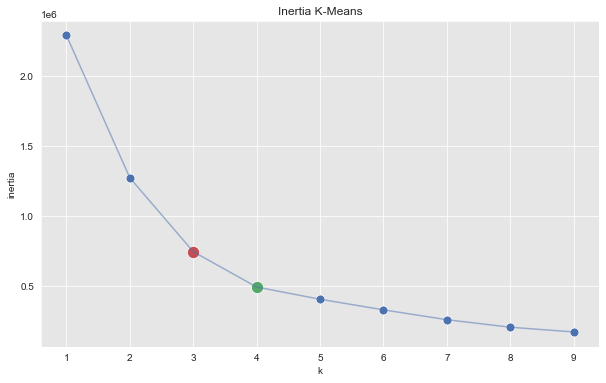

In [249]:
from sklearn.cluster import KMeans

data_df = X #pd.read_csv('X.csv')
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(data_df)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.scatterplot(x=[k_candidates[3]], y = [inertias[3]], color=sns_c[2], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 4. 

## Generate 3 clusters

In [250]:
from sklearn.cluster import KMeans

cluster_number = 4 # select the number of clusters based on the Elbow Method "plot above"

kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(X)

labels = kmeans.labels_ 

X['label'] = labels

X['cluster'] = 'E'
X.loc[X['label'] == 0, 'cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'

X['label'].unique()

array([1, 3, 2, 0])

In [251]:
X['cluster'].unique()

array(['B', 'D', 'C', 'A'], dtype=object)

# Model Evaluation
## Create Custom Palette for the Labels

customPalette


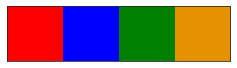

In [275]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette https://www.webucator.com/blog/2015/03/python-color-constants-module/
print('customPalette')
customPalette = ['#FF0000', '#0000FF', '#008000', '#E49202']
sns.set_palette(customPalette)
sns.palplot(customPalette)


esmap_colors


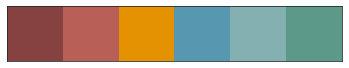

In [253]:
print('esmap_colors')
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)
sns.palplot(esmap_colors)

## Create labeled groups of data
Next, we need to generate some data to plot. I defined four groups (A, B, C, and D) and specified their center points. For each label, I sampled nx2 data points from a gaussian distribution centered at the mean of the group and with a standard deviation of 0.5.

To make these plots, each datapoint needs to be assigned a label. If your data isn't labeled, you can use a clustering algorithm to create artificial groups.

In [254]:
X['cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'
X.loc[X['label'] == 4, 'cluster'] = 'E'
X.head(10)

,C22,C64,C88,C117,C119A,C26A,C26B,C68A,C68B,C107A,...,C57_Other,C41_Yes,C41_No,C83_No,C112_No,C130_No,C142_No,C175_No,label,cluster
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
6,9.30,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,B
7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B
8,37.21,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,3,D
9,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,B


# Ploting clusters by Attributes

## Getting Total attributes from csv 

In [255]:
Attributes_MTF_Rwanda = pd.read_csv('Attributes_MTF_Rwanda.csv')
Attributes_MTF_Rwanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3295 non-null   int64  
 1   Total_Capacity_in_kWh_month          3295 non-null   float64
 2   Total_Availability_day_in_hours      1459 non-null   float64
 3   Total_Availability_evening_in_hours  3295 non-null   object 
 4   Total_Reliability                    3295 non-null   object 
 5   Total_Quality                        1591 non-null   object 
 6   Total_Legality                       3295 non-null   int64  
 7   Total_Health                         1581 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 206.1+ KB


In [256]:
Attributes_MTF_Rwanda = Attributes_MTF_Rwanda.drop(['Unnamed: 0'],axis=1)

In [257]:
col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(Attributes_MTF_Rwanda,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [258]:
Attributes_MTF_Rwanda.head()

,Total_Capacity_in_kWh_month,Total_Availability_day_in_hours,Total_Availability_evening_in_hours,Total_Reliability,Total_Quality,Total_Legality,Total_Health
0,0.0,NaN,Missing_data,Missing_data,NaN,0,NaN
1,0.0,NaN,Missing_data,Missing_data,NaN,-1,NaN
2,0.0,NaN,Missing_data,Missing_data,NaN,-1,NaN
3,0.0,NaN,Missing_data,Missing_data,NaN,-1,NaN
4,0.0,NaN,Missing_data,Missing_data,NaN,-1,NaN


In [259]:
Attributes_MTF_Rwanda['Total_Capacity_in_kWh_month'] = Attributes_MTF_Rwanda['Total_Capacity_in_kWh_month'].replace('Missing_data', np.nan)
Attributes_MTF_Rwanda['Total_Availability_day_in_hours'] = Attributes_MTF_Rwanda['Total_Availability_day_in_hours'].replace('Missing_data', np.nan)
Attributes_MTF_Rwanda['Total_Availability_evening_in_hours'] = Attributes_MTF_Rwanda['Total_Availability_evening_in_hours'].replace('Missing_data', np.nan)
Attributes_MTF_Rwanda['Total_Reliability'] = Attributes_MTF_Rwanda['Total_Reliability'].replace('Missing_data', np.nan)
Attributes_MTF_Rwanda['Total_Quality'] = Attributes_MTF_Rwanda['Total_Quality'].replace('Missing_data', np.nan)
Attributes_MTF_Rwanda['Total_Legality'] = Attributes_MTF_Rwanda['Total_Legality'].replace(-1, np.nan)
Attributes_MTF_Rwanda['Total_Health'] = Attributes_MTF_Rwanda['Total_Health'].replace('Missing_data', np.nan)

In [260]:
#Attributes_MTF_Rwanda.head()

In [261]:
Attributes_MTF_Rwanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total_Capacity_in_kWh_month          3295 non-null   float64
 1   Total_Availability_day_in_hours      1459 non-null   float64
 2   Total_Availability_evening_in_hours  1514 non-null   object 
 3   Total_Reliability                    538 non-null    object 
 4   Total_Quality                        1458 non-null   object 
 5   Total_Legality                       1632 non-null   float64
 6   Total_Health                         1581 non-null   object 
dtypes: float64(3), object(4)
memory usage: 180.3+ KB


In [262]:
Attributes_MTF_Rwanda['Total_Availability_day_in_hours'].value_counts()

24.0    292
22.0    240
23.0    225
20.0    204
12.0     74
21.0     61
15.0     51
18.0     46
10.0     32
6.0      29
2.0      24
5.0      23
19.0     22
3.0      21
16.0     17
4.0      16
1.0      16
14.0     14
17.0     14
8.0      12
13.0     11
11.0      7
7.0       5
9.0       3
Name: Total_Availability_day_in_hours, dtype: int64

In [263]:
Attributes_MTF_Rwanda['Total_Availability_evening_in_hours'] = pd.to_numeric(Attributes_MTF_Rwanda['Total_Availability_evening_in_hours'])

In [264]:
Attributes_MTF_Rwanda['Total_Availability_evening_in_hours'].value_counts()

4.0    764
3.0    394
2.0    239
1.0    117
Name: Total_Availability_evening_in_hours, dtype: int64

In [265]:
Attributes_MTF_Rwanda['Total_Reliability'] = pd.to_numeric(Attributes_MTF_Rwanda['Total_Reliability'])

In [266]:
Attributes_MTF_Rwanda['Total_Reliability'].value_counts()

1.0     207
2.0     150
3.0      90
4.0      42
5.0      27
6.0      11
8.0       5
10.0      4
7.0       2
Name: Total_Reliability, dtype: int64

In [267]:
Attributes_MTF_Rwanda['Total_Quality'].value_counts()

No     1115
Yes     343
Name: Total_Quality, dtype: int64

In [268]:
Attributes_MTF_Rwanda['Total_Legality'] = Attributes_MTF_Rwanda['Total_Legality'].astype(str) 

In [269]:
Attributes_MTF_Rwanda['Total_Legality'].value_counts()

nan    1663
1.0    1400
2.0     109
0.0      41
6.0      32
3.0      24
4.0      14
7.0      10
5.0       2
Name: Total_Legality, dtype: int64

In [270]:
Attributes_MTF_Rwanda['Total_Health'].value_counts()

No     1575
Yes       6
Name: Total_Health, dtype: int64

In [271]:
Attributes_MTF_Rwanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total_Capacity_in_kWh_month          3295 non-null   float64
 1   Total_Availability_day_in_hours      1459 non-null   float64
 2   Total_Availability_evening_in_hours  1514 non-null   float64
 3   Total_Reliability                    538 non-null    float64
 4   Total_Quality                        1458 non-null   object 
 5   Total_Legality                       3295 non-null   object 
 6   Total_Health                         1581 non-null   object 
dtypes: float64(4), object(3)
memory usage: 180.3+ KB


## Generaing plots

In [272]:
X_A = pd.merge(Attributes_MTF_Rwanda, X, left_index=True, right_index=True)

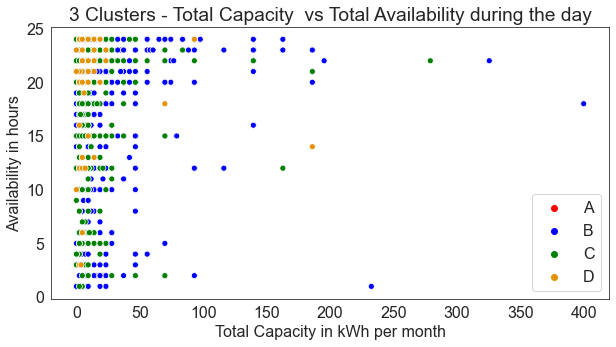

In [276]:
fig, axes = plt.subplots(figsize=(10, 5))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Availability_day_in_hours'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='lower right')
plt.title('3 Clusters - Total Capacity  vs Total Availability during the day')
plt.xlabel("Total Capacity in kWh per month")
plt.ylabel("Availability in hours")
plt.savefig('3 Clusters - Capacity vs Availabilty_day.jpg',dpi=300)
plt.show()

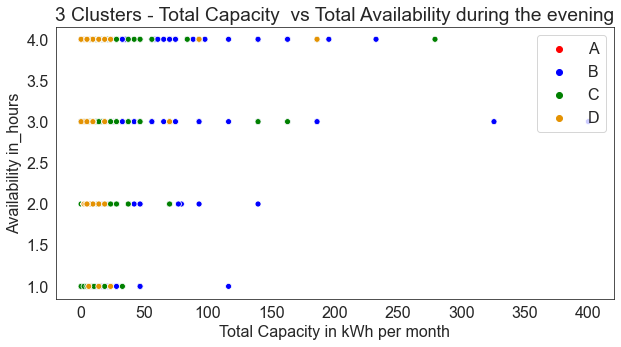

In [277]:
fig, axes = plt.subplots(figsize=(10, 5))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Availability_evening_in_hours'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='upper right')
plt.title('3 Clusters - Total Capacity  vs Total Availability during the evening')
plt.xlabel("Total Capacity in kWh per month")
plt.ylabel("Availability in_hours")
plt.savefig('3 Clusters - Capacity vs Availabilty_evening.jpg',dpi=300)
plt.show()

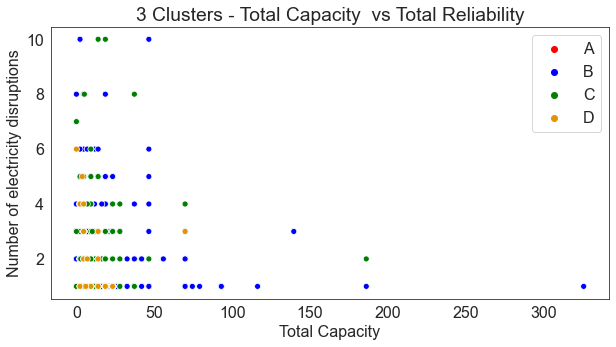

In [278]:
fig, axes = plt.subplots(figsize=(10, 5))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Reliability'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='upper right')
plt.title('3 Clusters - Total Capacity  vs Total Reliability')
plt.xlabel("Total Capacity")
plt.ylabel("Number of electricity disruptions")
plt.savefig('3 Clusters - Capacity vs Reliability.jpg',dpi=300)
plt.show()

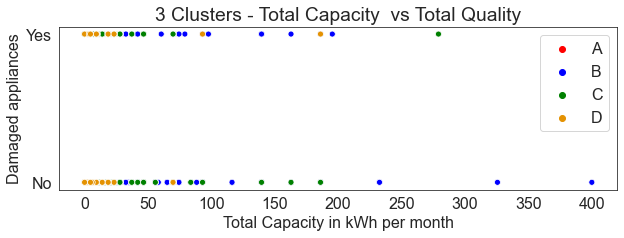

In [279]:
fig, axes = plt.subplots(figsize=(10, 3))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Quality'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='upper right')
plt.title('3 Clusters - Total Capacity  vs Total Quality')
plt.xlabel("Total Capacity in kWh per month")
plt.ylabel("Damaged appliances")
plt.savefig('3 Clusters - Capacity vs Total_Quality.jpg',dpi=300)
plt.show()

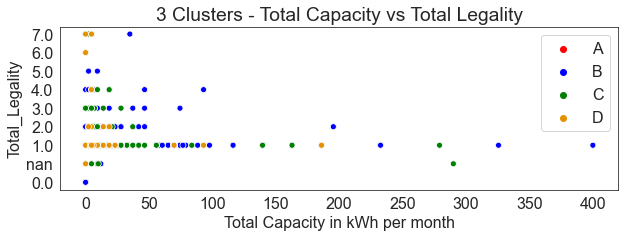

In [280]:
fig, axes = plt.subplots(figsize=(10, 3))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Legality'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='upper right')
plt.title('3 Clusters - Total Capacity vs Total Legality') 
plt.xlabel("Total Capacity in kWh per month")
#plt.ylabel("Hours of electricity each day")
plt.savefig('3 Clusters - Capacity vs Total_Legality.jpg',dpi=300)
plt.show()

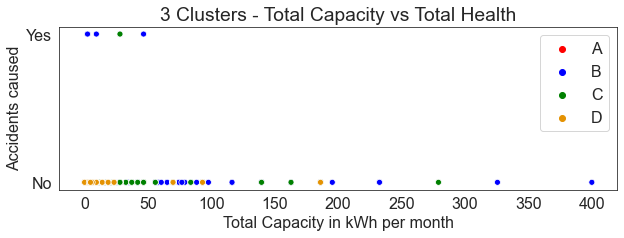

In [282]:
fig, axes = plt.subplots(figsize=(10, 3))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X_A['Total_Capacity_in_kWh_month'], X_A['Total_Health'], hue=sorted(X['cluster']), 
                palette=customPalette[0:4])
plt.legend(loc='upper right')
plt.title('3 Clusters - Total Capacity vs Total Health')
plt.xlabel("Total Capacity in kWh per month")
plt.ylabel("Accidents caused")
plt.savefig('3 Clusters - Capacity vs Total Health.jpg',dpi=300)
plt.show()

## Test Markers with labels centered on the cluster means


In [283]:
qgrid.show_grid(X_A,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

X[X['cluster']=='C'].to_csv("Households clustered C.csv")
X[X['C_Index']==3].to_csv("Households C_Index 3.csv")
X.to_csv("All variables.csv")

scaled_X.head()

## Ploting the radius for each cluster
### Determine the kmean radii
https://datascience.stackexchange.com/questions/32753/find-cluster-diameter-and-associated-cluster-points-with-kmeans-clustering-scik

In [284]:
#iris example from https://datascience.stackexchange.com/questions/32753/find-cluster-diameter-and-associated-cluster-points-with-kmeans-clustering-scik

x = X_A
estimator = kmeans
y_kmeans = labels

#To get the clusters' radii you can use the following code snippet:

#empty dictionaries

clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate Euclidian distance of 
each point within that cluster from its centroid and 
pick the maximum which is the radius of that cluster'''

for cluster in list(set(y_kmeans)):

    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],
                                         estimator.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster]))
                                   for i in zip(x.loc[y_kmeans == cluster, 'Total_Capacity_in_kWh_month'],
                                                x.loc[y_kmeans == cluster, 'Total_Availability_day_in_hours'])])


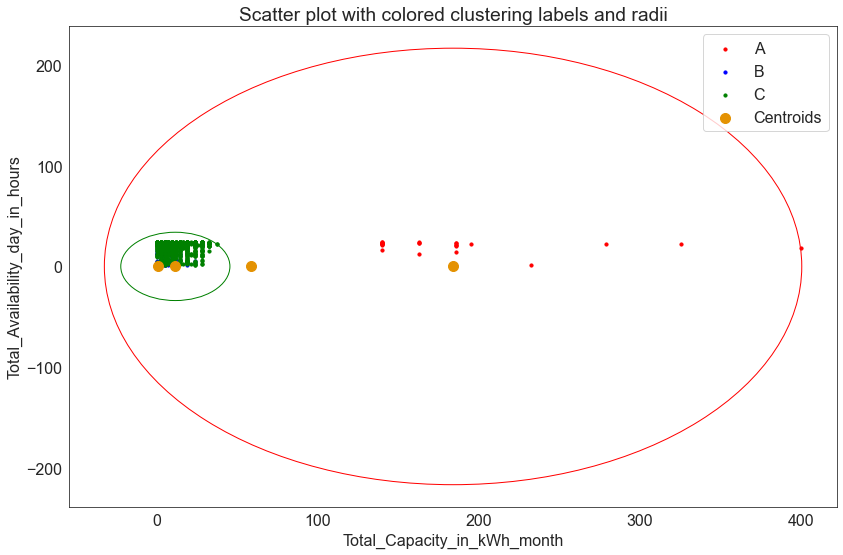

In [285]:
#Visualising the clusters and cluster circles
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x.loc[y_kmeans == 0, 'Total_Capacity_in_kWh_month'], x.loc[y_kmeans == 0, 'Total_Availability_day_in_hours'], s = 10, c = customPalette[0], label = 'A')
art = patches.Circle(clusters_centroids[0],clusters_radii[0], edgecolor='r',fill=False)
ax.add_patch(art)

plt.scatter(x.loc[y_kmeans == 1, 'Total_Capacity_in_kWh_month'], x.loc[y_kmeans == 1, 'Total_Availability_day_in_hours'], s = 10, c = customPalette[1], label = 'B')
art = patches.Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False)
ax.add_patch(art)

plt.scatter(x.loc[y_kmeans == 2, 'Total_Capacity_in_kWh_month'], x.loc[y_kmeans == 2, 'Total_Availability_day_in_hours'], s = 10, c = customPalette[2], label = 'C')
art = patches.Circle(clusters_centroids[2],clusters_radii[2], edgecolor='g',fill=False)
ax.add_patch(art)

#Plotting the centroids of the clusters
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:,1], s = 100, c = customPalette[3], label = 'Centroids')

ax.set_title('Scatter plot with colored clustering labels and radii')
ax.set_xlabel('Total_Capacity_in_kWh_month')
ax.set_ylabel('Total_Availability_day_in_hours')
plt.legend()
plt.tight_layout()
plt.savefig('3_clusters_Total_Capacity_in_kWh_month-Total_Availability_day_in_hours.jpg',dpi=300)

## PCA Projection to 2D
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

### Standarizing and scaling the parameters

#### Non-categorical variables

In [286]:
from sklearn import preprocessing
# Get column names first
# Non-categorical variables
nonCat_X = X.filter(['C22', 'C64','C88','C117','C119A','C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B','C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B','C29A','C29B','C71A','C71B'])
X_names = nonCat_X.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_X = scaler.fit_transform(nonCat_X)
scaled_X = pd.DataFrame(scaled_X, columns=X_names)
scaled_X.head(5)

,C22,C64,C88,C117,C119A,C26A,C26B,C68A,C68B,C107A,...,C108A,C108B,C138A,C138B,C173A,C173B,C29A,C29B,C71A,C71B
0,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,-0.017424,-0.017424,-0.027342,-0.036616,-0.094439,-0.173235,-0.354591,-0.634872,-0.024644,-0.041096
1,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,-0.017424,-0.017424,-0.027342,-0.036616,-0.094439,-0.173235,-0.354591,-0.634872,-0.024644,-0.041096
2,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,-0.017424,-0.017424,-0.027342,-0.036616,-0.094439,-0.173235,-0.354591,-0.634872,-0.024644,-0.041096
3,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,-0.017424,-0.017424,-0.027342,-0.036616,-0.094439,-0.173235,-0.354591,-0.634872,-0.024644,-0.041096
4,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,-0.017424,-0.017424,-0.027342,-0.036616,-0.094439,-0.173235,-0.354591,-0.634872,-0.024644,-0.041096


In [287]:
X['E_Index'] = HH_MTF_Rwanda['E_Index']

In [288]:
#X.info()

In [289]:
X_dummy = X.drop(['C22', 'C64','C88','C117','C119A','C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B','C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B','C29A','C29B','C71A','C71B'], axis=1)

In [290]:
X_dummy.head()

,C39_Yes,C39_No,C39_0,C81_No,C110_Yes,C140_Yes,C140_No,C17_Pre-paid,C17_Monthly bill,C17_Fixed monthly fee,...,C41_Yes,C41_No,C83_No,C112_No,C130_No,C142_No,C175_No,label,cluster,E_Index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,B,2.4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,B,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,B,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,B,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,B,0.0


In [291]:
Xs = scaled_X.join(X_dummy, how='outer')
Xs.head()

,C22,C64,C88,C117,C119A,C26A,C26B,C68A,C68B,C107A,...,C41_Yes,C41_No,C83_No,C112_No,C130_No,C142_No,C175_No,label,cluster,E_Index
0,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,0,0,0,0,0,0,0,1,B,2.4
1,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,0,0,0,0,0,0,0,1,B,0.0
2,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,0,0,0,0,0,0,0,1,B,0.0
3,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,0,0,0,0,0,0,0,1,B,0.0
4,-0.403419,-0.043239,-0.017424,-0.017424,-0.019713,-0.400783,-0.839974,-0.018272,-0.047078,-0.017424,...,0,0,0,0,0,0,0,1,B,0.0


In [292]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = Xs.drop(['label','cluster','E_Index'], axis=1)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_pca = pd.concat([principalDf, X[['cluster']]], axis = 1)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  3295 non-null   float64
 1   principal component 2  3295 non-null   float64
 2   cluster                3295 non-null   object 
dtypes: float64(2), object(1)
memory usage: 77.4+ KB


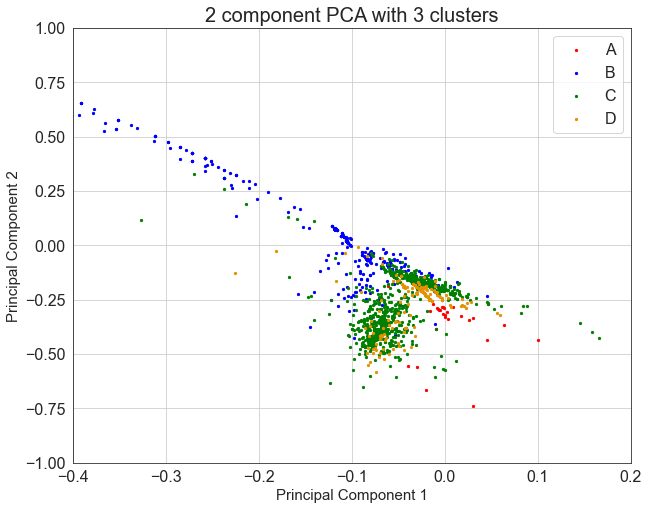

In [301]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-1,1)
ax.set_xlim(-0.4,0.2)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with 3 clusters', fontsize = 20)
targets = ['A', 'B', 'C', 'D']
colors = [customPalette[0], customPalette[1], customPalette[2], customPalette[3]]
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['cluster'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.savefig('2D-PCA_3_clusters.jpg',dpi=300)

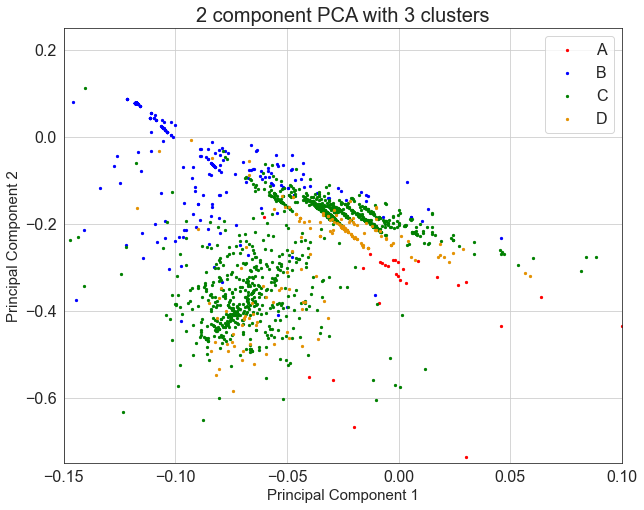

In [302]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-0.75,0.25)
ax.set_xlim(-0.15,0.1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with 3 clusters', fontsize = 20)
targets = ['A', 'B', 'C', 'D']
colors = [customPalette[0], customPalette[1], customPalette[2], customPalette[3]]
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['cluster'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.savefig('2D-PCA_3_clusters.jpg',dpi=300)

In [295]:
df_pca.describe()

,principal component 1,principal component 2
count,3.295000e+03,3.295000e+03
mean,1.595756e-16,2.695534e-18
std,2.243713e+00,2.239079e+00
min,-3.123484e+01,-7.370287e-01
25%,-1.177056e-01,-1.912750e-01
50%,-1.177056e-01,7.691259e-02
75%,-4.617390e-02,7.691259e-02
max,9.437382e+01,1.240792e+02


## Numbered points on the PCA projection

In [296]:
# Create a DataFrame which includes df_pca and the variable C_Index
df_pca_C = df_pca
df_pca_C['E_Index'] = HH_MTF_Rwanda['E_Index'].astype(int)
df_pca_C.head()

,principal component 1,principal component 2,cluster,E_Index
0,-0.117997,0.077104,B,2
1,-0.117706,0.076913,B,0
2,-0.117706,0.076913,B,0
3,-0.117706,0.076913,B,0
4,-0.117706,0.076913,B,0


In [297]:
qgrid.show_grid(df_pca_C,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [298]:
#create a new figure and set the x and y limits
#fig, ax = plt.subplots(figsize=(10,8))
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
# set the axes limit according to dataframe values
ax.set_ylim(-1,1)
ax.set_xlim(-0.4,0.2)

# list of all cluster labels
clusters = df_pca_C['cluster'].unique()       

for i in range(0,len(clusters)):
    cluster = clusters[i]
    df_pca_cluster = df_pca_C.loc[df_pca_C['cluster']==cluster,:]
    
    for l, row in df_pca_cluster.iterrows():
        #add the data point as text
        ax.annotate(s=row['E_Index'], 
                     xy=(row['principal component 1'],row['principal component 2']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=7,
                     color=customPalette[i]) 

        #add label placed at the centroid
        plt.annotate(cluster, 
                  df_pca_C.loc[df_pca_C['cluster']==cluster,['principal component 1','principal component 2']].mean(),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=16, weight='bold',
                  color=customPalette[i])

ax.set_title('2 component PCA showing E_Index on each point')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
 
plt.savefig('2D-PCA-numbered-3_clusters.jpg',dpi=300)
plt.show()

ValueError: Image size of 116834x27255 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x576 with 1 Axes>

In [299]:
#create a new figure and set the x and y limits
#fig, ax = plt.subplots(figsize=(10,8))
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
# set the axes limit according to dataframe values
ax.set_ylim(-0.5,0.2)
ax.set_xlim(-0.1,0.1)

# list of all cluster labels
clusters = df_pca_C['cluster'].unique()       

for i in range(0,len(clusters)):
    cluster = clusters[i]
    df_pca_cluster = df_pca_C.loc[df_pca_C['cluster']==cluster,:]
    
    for l, row in df_pca_cluster.iterrows():
        #add the data point as text
        ax.annotate(s=row['E_Index'], 
                     xy=(row['principal component 1'],row['principal component 2']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=7,
                     color=customPalette[i]) 

        #add label placed at the centroid
        plt.annotate(cluster, 
                  df_pca_C.loc[df_pca_C['cluster']==cluster,['principal component 1','principal component 2']].mean(),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=16, weight='bold',
                  color=customPalette[i])

ax.set_title('2 component PCA showing E_Index on each point')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
 
plt.savefig('2D-PCA-numbered-3_clusters-zoom.jpg',dpi=300)
plt.show()

ValueError: Image size of 350466x77563 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x576 with 1 Axes>